<h1><center> Mini Project Data Mining</center></h1>

# About
    Data scientist must know about the data mining to find the hidden relationship that in the dataset.
    Data mining field used machine learning application to make a good models with the best accurecy to get benifit from the data.
    
    In this project we will try Three classifiers and find the accurecy and the execution time for each one of them:
       🌏 SVC : Support Vector Classifiers
       🌏 KNeighborsClassifier
       🌏 DecisionTreeClassifier
    We will walk throughout: 
       🌗 What is classification?
       🌗 What is SVC?
       🌗 What is KNeighborsClassifier?
       🌗 What is DecisionTreeClassifier?
       🌗 What is better SVC or KNC?
       🌗 What is better DTC or KNC?
       🌗 Getting started with coding

       
    
## What is classification?
    Classification used to classify the data, this mean devide the data into groups or catigorizing data into classes, so this will be better understood and analyzed.

## What is SVC?
    Support Vector Classifier (SVC) is one of the techniques used in the classification domain and in machine learning we call it a Support Vector Machine (SVM) or the Marginal Based Classifier that selects the maximum margin and is used for the classification of linear or non-linear data.

## What is KNeighborsClassifier?
    💧 The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.
    
    💧 The K-Nearest Neighbors algorithm is a supervised machine learning algorithm for labeling an unknown data point given existing labeled data. The nearness of points is typically determined by using distance algorithms such as the Euclidean distance formula based on parameters of the data.
    
## What is DecisionTreeClassifier?
    Decision trees are an approach used in supervised machine learning, a technique which uses labelled input and output datasets to train models. The approach is used mainly to solve classification problems, which is the use of a model to categorise or classify an object.

## What is better SVC or KNC?
    SVC is better than KNC (K Neighbors Classifier) when the dataset is large abd take cares of outliers better than KNN, but if the dataset is small KNC is better than SVC.
## What is better DTC or KNC?
    Decision trees can be faster, however, KNN tends to be slower with large datasets because it scans the whole dataset to predict as it doesn't generalize the data in advance. 

# Getting started with coding

### Dependencies & Installation
    🌝 pandas : pip install pandas
    🌝 numpy : pip install numpy : it installed with pandas
    🌝 sklearn : pip isntall sklearn
    🌝 seaborn : pip install seaborn
    🌝 matplotlib : pip install matplotlib
    🌝 feature_engine : pip install feature_engine


In [1]:
# importing modules
 # import data manipulation tools
import pandas as pd
import numpy as np
 # import visualization tool
import seaborn as sea
import matplotlib.pyplot as plt
 # import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
 # import roc curve function
from sklearn.metrics import roc_curve
 # import accurecy function to calculate the accurecy for each model
from sklearn.metrics import accuracy_score
 # feature_engine used to drop the correlated features from the dataset
from feature_engine.selection import DropCorrelatedFeatures   
 # splits dataset into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# read the data
df = pd.read_csv("pd_speech_features.csv")

In [3]:
# show the head of the data
# we can see below that there is no categorical data so we don't need to transform specific columns.
# the shape of the data (8 rows × 755 columns)
df.head(8)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1


In [4]:
# Get some info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
# Here we check if there are nan value so I will get the final total of all values if the total zero so there is now nan value
is_nan = df.isna().sum().sum()
if is_nan:
    print("There are nan values")
else:
    print("There are not nan values")


There are not nan values


#### drop the columns that we don't need them
##### and for this task we will use the DropCorrelatedFeatures from feature_engine.selection library
##### The DropCorrelatedFeatures() finds and removes correlated variables from a dataframe. The user can pass a list of variables to examine, or alternatively the selector will examine all numerical variables in the data set.

In [6]:
# the methods that we can use them to find the correlation between features spearman | pearson | kendall 
drop_corr_cols = DropCorrelatedFeatures(variables=None, threshold=0.6, method="spearman")

# make the transform
transformation = drop_corr_cols.fit_transform(df)
transformation.head(8)

,id,gender,PPE,DFA,RPDE,numPulses,locShimmer,minIntensity,f1,f2,...,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_34,class
0,0,1,0.85247,0.71826,0.57227,240,0.05883,69.997496,539.342735,1031.849040,...,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.6445,4.2105,2.6202,1
1,0,1,0.76686,0.69481,0.53966,234,0.05516,67.415903,564.363615,1016.367294,...,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,3.6107,14.1962,6.5245,1
2,0,1,0.85083,0.67604,0.58982,232,0.09902,62.661706,548.444604,1032.406341,...,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,2.3308,10.7458,2.9199,1
3,1,0,0.41121,0.79672,0.59257,178,0.05451,76.306989,819.529588,1201.813897,...,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,3.5664,14.0403,4.8460,1
4,1,0,0.32790,0.79782,0.53028,236,0.05610,76.645686,846.796144,1215.346469,...,2.4627,2.1073,1.9056,2.2214,2.0588,1.8157,5.8416,5.7621,8.2103,1
5,1,0,0.50780,0.78744,0.65451,226,0.07752,74.084566,832.437252,1193.223486,...,2.6081,2.1874,2.0542,2.6534,2.2061,1.8240,5.0734,5.9966,3.4153,1
6,2,1,0.76095,0.62145,0.54543,322,0.03203,75.059718,710.861860,1165.801015,...,2.1890,2.6872,1.6076,1.5318,1.7182,1.6103,75.3156,7.7060,12.8353,1
7,2,1,0.83671,0.62079,0.51179,318,0.06300,75.097654,668.306515,1165.769341,...,3.1184,2.7436,1.7994,1.6115,1.6696,3.2216,11.8909,4.3682,11.7552,1


In [7]:
# we can see how we got rid of a lot of columns that we don't need them
print(F"The shape of the data before: {df.shape}", F"The shape of the data before: {transformation.shape}")

The shape of the data before: (756, 755) The shape of the data before: (756, 222)


In [8]:
new_df = transformation
new_df.drop('id', axis=1, inplace=True)
new_df.head(8)

,gender,PPE,DFA,RPDE,numPulses,locShimmer,minIntensity,f1,f2,f3,...,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_34,class
0,1,0.85247,0.71826,0.57227,240,0.05883,69.997496,539.342735,1031.849040,2447.162183,...,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.6445,4.2105,2.6202,1
1,1,0.76686,0.69481,0.53966,234,0.05516,67.415903,564.363615,1016.367294,2383.565201,...,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,3.6107,14.1962,6.5245,1
2,1,0.85083,0.67604,0.58982,232,0.09902,62.661706,548.444604,1032.406341,2357.826954,...,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,2.3308,10.7458,2.9199,1
3,0,0.41121,0.79672,0.59257,178,0.05451,76.306989,819.529588,1201.813897,3154.035654,...,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,3.5664,14.0403,4.8460,1
4,0,0.32790,0.79782,0.53028,236,0.05610,76.645686,846.796144,1215.346469,3201.513132,...,2.4627,2.1073,1.9056,2.2214,2.0588,1.8157,5.8416,5.7621,8.2103,1
5,0,0.50780,0.78744,0.65451,226,0.07752,74.084566,832.437252,1193.223486,3177.289013,...,2.6081,2.1874,2.0542,2.6534,2.2061,1.8240,5.0734,5.9966,3.4153,1
6,1,0.76095,0.62145,0.54543,322,0.03203,75.059718,710.861860,1165.801015,3049.357722,...,2.1890,2.6872,1.6076,1.5318,1.7182,1.6103,75.3156,7.7060,12.8353,1
7,1,0.83671,0.62079,0.51179,318,0.06300,75.097654,668.306515,1165.769341,2954.648489,...,3.1184,2.7436,1.7994,1.6115,1.6696,3.2216,11.8909,4.3682,11.7552,1


In [9]:
# before get in the models and classifiers we must split our data to training and testing
# x train & x test & y train & y test

# The data without the target variable
X = new_df.drop("class", axis=1)
# the target variable
Y = new_df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # random_state used to make shuffilling to the data


In [10]:
# now we will prepare the models
import time 

start_time = time.time()

models_dict = {
    
    "Support Vector Classifier": SVC(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# loop through the dictionary: the get the accurecy for each one of models
accurecies_of_models = {
    "Support Vector Classifier": None,
    "K Neighbors Classifier": None,
    "Decision Tree Classifier": None
    
}

for name_model, model in models_dict.items():
    
    # fit the model --> train the model --> fit(feature_train "x_train", label_train "y_train")
    model = model.fit(x_train, y_train)
    # make prediction for features_test "x_test"
    y_predictied = model.predict(x_test)
    
    update_dict = {(name_model, accuracy_score(y_test, y_predictied))}
    accurecies_of_models.update(update_dict)  # y_test --> labels_test
    print("[info]: ", name_model, "is trained...")
    end_time = time.time()
    print(f"The execution time for {name_model} is", end_time - start_time)

[info]:  Support Vector Classifier is trained...
The execution time for Support Vector Classifier is 0.18499422073364258
[info]:  K Neighbors Classifier is trained...
The execution time for K Neighbors Classifier is 0.3349947929382324
[info]:  Decision Tree Classifier is trained...
The execution time for Decision Tree Classifier is 0.4250011444091797


In [11]:
# show the accurecies of all models
accurecies_of_models

{'Support Vector Classifier': 0.75,
 'K Neighbors Classifier': 0.743421052631579,
 'Decision Tree Classifier': 0.7631578947368421}

# Now we will visualize our results


<AxesSubplot:>

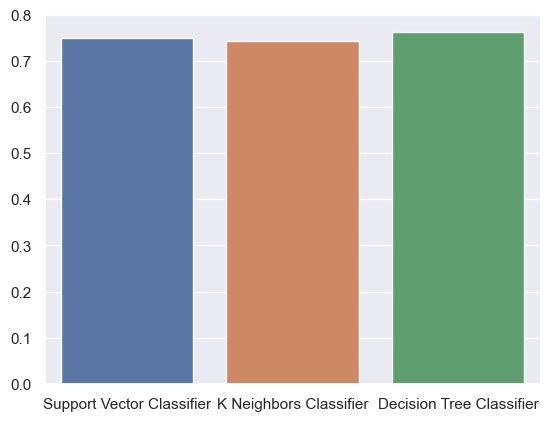

In [12]:
# Seaborn style
sea.set()

data = pd.DataFrame(accurecies_of_models, index=[0])
labels = ['SVC', 'KNC', 'DTC']
sea.barplot(data=data)
# The best accurecy we got using Decision Tree Classifier

In [13]:
data

,Support Vector Classifier,K Neighbors Classifier,Decision Tree Classifier
0,0.75,0.743421,0.763158


# ROC Curve : Receiver Operating Characteristic Curve

#### There are two main things we want to get:
    📌 False positive rate
    📌 True positive rate

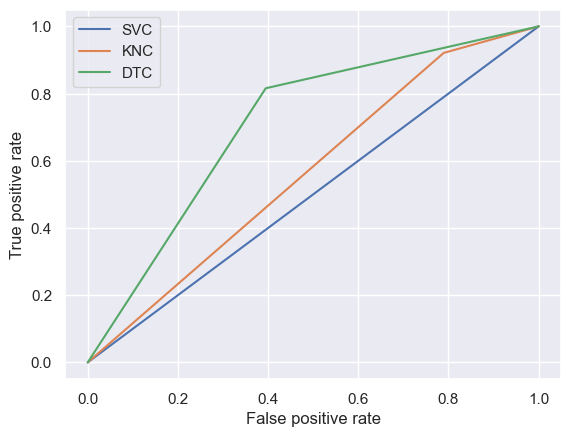

In [14]:

for name_model, model in models_dict.items():
    # fit the model --> train the model --> fit(feature_train "x_train", label_train "y_train")
    model = model.fit(x_train, y_train)
    # make prediction for features_test "x_test"
    y_predictied = model.predict(x_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predictied[::1])

    # now let us visualize using plot line
    sea.lineplot(x=false_positive_rate, y=true_positive_rate)
    
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['SVC', 'KNC', 'DTC'])


<h1><center> GOOD LUCK </center></h1>